Code for **"Flash/No Flash"** figure. 

In [0]:
#!git clone https://github.com/DmitryUlyanov/deep-image-prior.git
# Citation: This codes is a replication from the Deep Image Prior paper code
'''
@article{UlyanovVL17,
    author    = {Ulyanov, Dmitry and Vedaldi, Andrea and Lempitsky, Victor},
    title     = {Deep Image Prior},
    journal   = {arXiv:1711.10925},
    year      = {2017}
}
'''

'\n@article{UlyanovVL17,\n    author    = {Ulyanov, Dmitry and Vedaldi, Andrea and Lempitsky, Victor},\n    title     = {Deep Image Prior},\n    journal   = {arXiv:1711.10925},\n    year      = {2017}\n}\n'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
# If run from on a separate drive directory
os.chdir('/content/drive/My Drive/Group60_Reproducibility_project_code-master')

# If run from the Deep learning reproducibility project drive directory
# os.chdir('/content/drive/My Drive/Deep learning reproducibility project/Group60_Reproducibility_project_code')

# Import libs

In [0]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import numpy as np
from models import *

import torch
import torch.optim

from utils.denoising_utils import *
from utils.sr_utils import load_LR_HR_imgs_sr
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True

# Load image

HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)


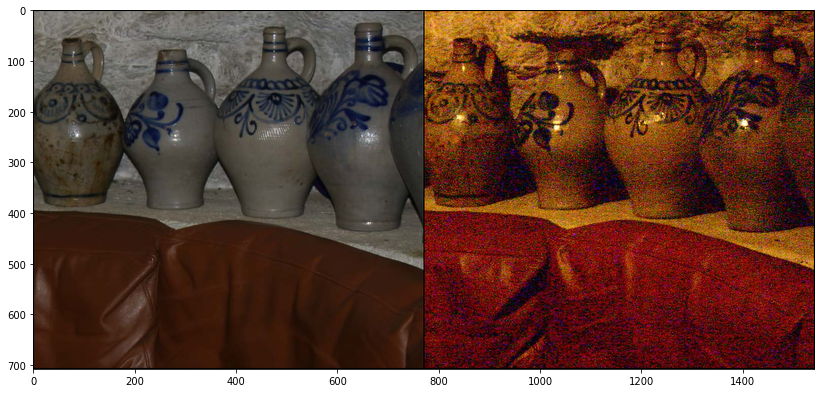

In [0]:
imgs = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')
img_flash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_flash_np = pil_to_np(img_flash)

img_noflash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_01_noflash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_noflash_np = pil_to_np(img_noflash)

g = plot_image_grid([img_flash_np, img_noflash_np],3,12)

In [0]:
# ## SAVE Corrupted IMAGE
# from PIL import Image
# img_noflash.save('Good_images/005')

# Setup

In [0]:
pad = 'reflection'
OPT_OVER = 'net'

num_iter = 3001 # original 601
LR = 0.1 
OPTIMIZER = 'adam'
reg_noise_std = 0.0
show_every = 50
figsize = 6

# We will use flash image as input
input_depth = 3
net_input =np_to_torch(img_flash_np).type(dtype)

In [0]:
net = skip(input_depth, 3, num_channels_down = [128, 128, 128, 128, 128], 
                        num_channels_up   = [128, 128, 128, 128, 128],
                        num_channels_skip = [4, 4, 4, 4, 4], 
                        upsample_mode=['nearest', 'nearest', 'bilinear', 'bilinear', 'bilinear'], 
                        need_sigmoid=True, need_bias=True, pad=pad).type(dtype)

mse = torch.nn.MSELoss().type(dtype)

img_flash_var = np_to_torch(img_flash_np).type(dtype)
img_noflash_var = np_to_torch(img_noflash_np).type(dtype)

# Optimize

Starting optimization with ADAM


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


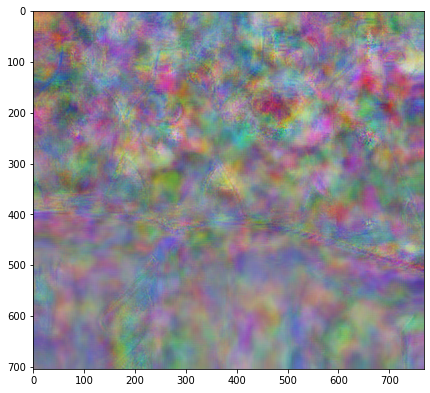

KeyboardInterrupt: ignored

In [0]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()


i = 0
def closure():
    
    global i, net_input
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
    
    out = net(net_input)
   
    total_loss = mse(out, img_noflash_var)
    total_loss.backward()
        
    print ('Iteration %05d    Loss %f' % (i, total_loss.item()), '\r', end='')
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)
        
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

Sometimes the process stucks at reddish image, just run the code from the top one more time. 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


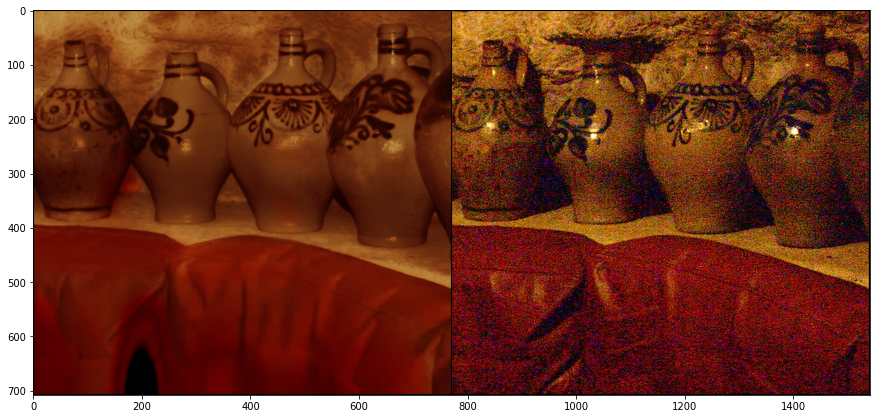

In [0]:
out_np = torch_to_np(net(net_input))
q = plot_image_grid([np.clip(out_np, 0, 1), img_noflash_np], factor=13);

In [0]:
# ## SAVE IMAGE
# from torchvision.utils import save_image
# A = net(net_input)[0]
# save_image(A, 'Results/006')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [0]:
# Image path of to be compared images (PSNR)
import math
import cv2


# Flash no Flash restoration
No_flash_path = 'Good_images/No-Flash_original_noisy.png'
Flash_path = 'data/flash_no_flash/cave01_00_flash.jpg'
restored_path = 'Results/Flash-no_Flash_restored.png'

In [0]:
# Load Image to compute psnr
noflash = cv2.imread(No_flash_path)
flash = cv2.imread(Flash_path)
restored = cv2.imread(restored_path)

In [0]:
# Compute PSNR
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
      return "Same Image"
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(restored,noflash)
print('The Peak Signal to Noise Ratio is: %f' % (d))

The Peak Signal to Noise Ratio is: 28.605075


In [0]:
# Show Images
from google.colab.patches import cv2_imshow
# Corrupt 
cv2_imshow(flash)
cv2.waitKey(0)
# Original
cv2_imshow(noflash)
cv2.waitKey(0)
# Restored
cv2_imshow(restored)
cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.